In [87]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
def prior(p):
    if 0 <= p <= 1:
        return 1
    else:
        return 0
def posterior(p,k=6,n=9):
    return prior(p)*binom.pmf(k,n,p)

In [89]:
pgrid=np.linspace(0,1,1000)

In [90]:
post_grid=np.array([posterior(i) for i in pgrid])
post_grid=post_grid/post_grid.sum()

In [91]:
nsamp=10000
samples=np.random.choice(pgrid, nsamp, p=post_grid)

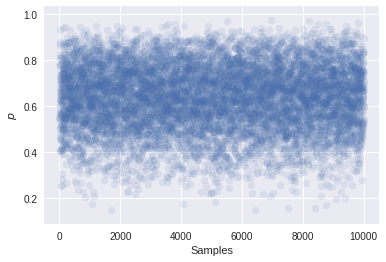

In [92]:
plt.scatter(range(nsamp),samples, alpha=0.1)
plt.xlabel('Samples')
plt.ylabel('$p$')

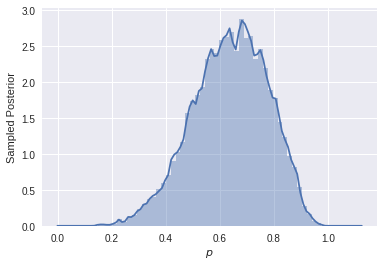

In [93]:
sns.distplot(samples,norm_hist=True, kde_kws={'bw':.05})
plt.ylabel('Sampled Posterior')
plt.xlabel('$p$')

In [94]:
quantiles=[np.percentile(samples,i) for i in [16,50,84]]
quantiles

[0.49549549549549549, 0.64464464464464466, 0.78078078078078073]

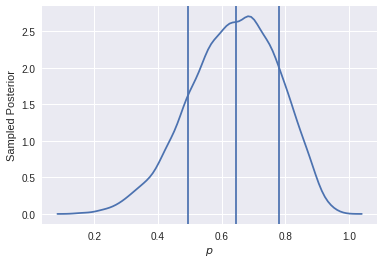

In [95]:
sns.kdeplot(samples)
for i in quantiles:
    plt.axvline(i)
plt.ylabel('Sampled Posterior')
plt.xlabel('$p$')

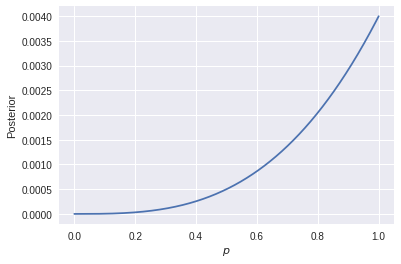

In [96]:
post_grid=np.array([posterior(i,3,3) for i in pgrid])
post_grid=post_grid/post_grid.sum()
plt.plot(pgrid,post_grid)
plt.xlabel('$p$')
plt.ylabel('Posterior')

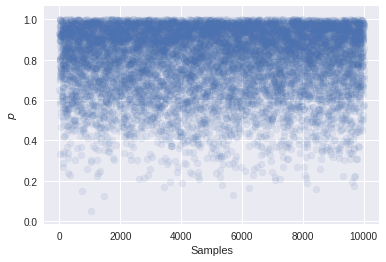

In [97]:
samples=np.random.choice(pgrid, nsamp, p=post_grid)
plt.scatter(range(nsamp),samples, alpha=0.1)
plt.xlabel('Samples')
plt.ylabel('$p$')

[0.62862862862862867, 0.84134134134134131, 0.957117117117117]


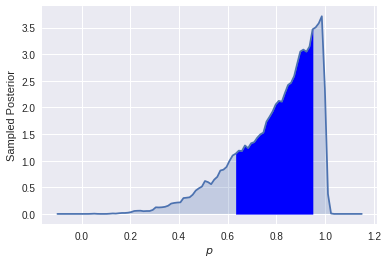

In [211]:
quantiles=[np.percentile(samples,i) for i in [16,50,84]]
print(quantiles)
points = sns.kdeplot(samples, shade=True,bw=0.05).get_lines()[0].get_data()

x = points[0]
y = points[1]

plt.fill_between(x,y, where = (x>=quantiles[0]) & (x<=quantiles[2]), color='b')
plt.ylabel('Sampled Posterior')
plt.xlabel('$p$')

In [224]:
# Highest Density Interval aka Highest Posterior Density Interval aka Minimum Eidth Bayesian Credible Interval
# To compute the X% HDI, you sort sample, then check all the X% intervals, and select the shortest
# https://stats.stackexchange.com/questions/252988/highest-density-interval-in-stan
# code from https://github.com/pymc-devs/pymc3/blob/master/pymc3/stats.py
# disclaimer: if distribution is bimodal it may fail (will only yield one interval)
x=np.sort(samples)
n = len(x)
cred_mass = 0.66

interval_idx_inc = int(np.floor(cred_mass * n))
n_intervals = n - interval_idx_inc
interval_width = x[interval_idx_inc:] - x[:n_intervals]

if len(interval_width) == 0:
    raise ValueError('Too few elements for interval calculation')

min_idx = np.argmin(interval_width)
hdi_min = x[min_idx]
hdi_max = x[min_idx + interval_idx_inc]
print(hdi_min, hdi_max)
quantiles=[hdi_min, hdi_max]

0.761761761762 1.0


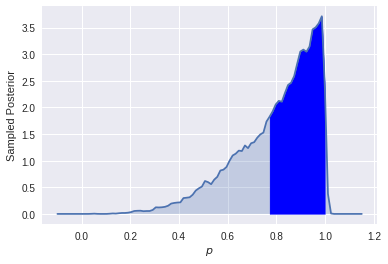

In [225]:
points = sns.kdeplot(samples, shade=True,bw=0.05).get_lines()[0].get_data()

x = points[0]
y = points[1]

plt.fill_between(x,y, where = (x>=quantiles[0]) & (x<=quantiles[1]), color='b')
plt.ylabel('Sampled Posterior')
plt.xlabel('$p$')

In [226]:
def loss(pi,post_grid,pgrid):
    return sum(post_grid*np.abs(pi-pgrid))

In [227]:
loss(0,post_grid,pgrid)

0.80040013333320037

In [228]:
loss_grid=np.array([loss(i,post_grid,pgrid) for i in pgrid])

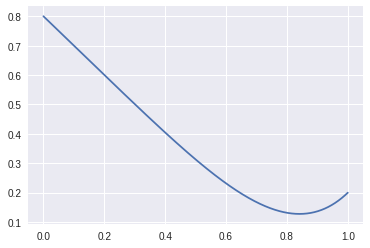

In [229]:
plt.plot(pgrid,loss_grid)

In [230]:
pgrid[np.argmin(loss_grid)]

0.84084084084084088

In [231]:
np.median(samples)

0.84134134134134131

In [ ]:
# Proof that median (50th percentile) minimizes the L1 loss function: 
# https://stats.stackexchange.com/questions/270428/how-do-i-show-that-the-sample-median-minimizes-the-sum-of-absolute-deviations

In [241]:
def loss2(pi,post_grid,pgrid):
    return sum(post_grid*(pi-pgrid)**2)

In [242]:
loss2(0,post_grid,pgrid)

0.66733366666633254

In [243]:
loss2(1,post_grid,pgrid)

0.066533399999933171

In [244]:
loss_grid=np.array([loss2(i,post_grid,pgrid) for i in pgrid])

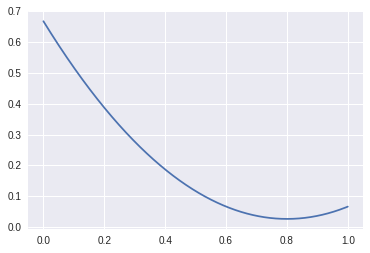

In [245]:
plt.plot(pgrid,loss_grid)

In [246]:
pgrid[np.argmin(loss_grid)]

0.80080080080080074

In [247]:
np.mean(samples)

0.79992752752752749

In [ ]:
# Proof that mean minimizes the L2 loss function: 
# https://math.stackexchange.com/a/2530425
# It's simpler than for L1 since L2's derivative is continuous